## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [30]:
#write your solution here
import pandas as pd
import matplotlib.pyplot as plt


### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [31]:
#Read the data into a dataframe
#Inser your code


#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
###
df=pd.read_csv('goodreads.csv')



Lets read the csv file with custom column descriptions specified in the problem statement.

In [32]:
#Read the data into a dataframe specifying column names


#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df = pd.read_csv("goodreads.csv", names = ['rating','revview_count','isbn','booktype','author_url','year','genre_urls','dir','rating_count','name'])
df.head()


rating revview_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url    year  \
0  https://www.goodreads.com/author/show/153394.S...  2008.0   
1  https://www.goodreads.com/author/show/1077326....  2003.0   
2  https://www.goodreads.com/author/show/941441.S...  2005.0   
3  https://www.goodreads.com/author/show/1825.Har...  1960.0   
4  https://www.goodreads.com/author/show/1265.Jan...  1813.0   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir rating_count  \
0                dir01/2767052-the-hunger-games.html      2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                          dir01/41865.Twilight.html      2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                dir01/1885.Pride_and_Prejudice.html      1388992   

                                                name  
0            The Hunger Games (The Hunger Games, #1)  
1  Harry Potter and the Order of the Phoenix (Har...  
2                            Twilight (Twilight, #1)  
3                              To Kill a Mockingbird  
4                                Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [33]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes

rating           float64
revview_count     object
isbn              object
booktype          object
author_url        object
year             float64
genre_urls        object
dir               object
rating_count      object
name              object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [34]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.


**Question:** Was the data read correctly and values represented as we expected?

Answer : 

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [35]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.rating.isna().sum()

2

In [36]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.rating.isna()]

rating revview_count  isbn booktype author_url  year genre_urls  \
3643     NaN          None  None     None       None   NaN        NaN   
5282     NaN          None  None     None       None   NaN        NaN   

                                  dir rating_count  name  
3643  dir37/9658936-harry-potter.html         None  None  
5282     dir53/113138.The_Winner.html         None  None

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [37]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df.dropna(subset=['rating','year'],inplace=True)
df.shape


(5993, 10)

Ok so we have done some cleaning. Is it enough? 

In [38]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes
#df.isna().sum()

rating           float64
revview_count     object
isbn              object
booktype          object
author_url        object
year             float64
genre_urls        object
dir               object
rating_count      object
name              object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [39]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df['rating_count']=df['rating_count'].astype('int')
df['revview_count']=df['revview_count'].astype('int')
df['year']=df['year'].astype('int')
df.dtypes


rating           float64
revview_count      int64
isbn              object
booktype          object
author_url        object
year               int64
genre_urls        object
dir               object
rating_count       int64
name              object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [40]:
#Insert Your code here


##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [41]:
#Get the first author_url
author = df['author_url'][0]
author

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [42]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
name = author.split(".")[-1]
name

'Suzanne_Collins'

In [43]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_author(url):
    name = url.split(".")[-1]
    return name
    

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()


rating  revview_count        isbn         booktype  \
0    4.40         136455  0439023483  good_reads:book   
1    4.41          16648  0439358078  good_reads:book   
2    3.56          85746  0316015849  good_reads:book   
3    4.23          47906  0061120081  good_reads:book   
4    4.23          34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [44]:
#Get first genre_url
df.isna().sum()

rating             0
revview_count      0
isbn             471
booktype           0
author_url         0
year               0
genre_urls        59
dir                0
rating_count       0
name               0
author             0
dtype: int64

In [45]:
newdf = df.dropna(subset=['genre_urls'])
newdf.shape

(5934, 11)

In [46]:
genre = newdf.genre_urls[0]
genre

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [47]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######
genres = genre.split("/genres/")[1:]
genres

newgenre = [genre.replace("|","") for genre in genres]
newgenre 

['young-adult',
 'science-fiction',
 'dystopia',
 'fantasy',
 'science-fiction',
 'romance',
 'adventure',
 'book-club',
 'young-adult',
 'teen',
 'apocalyptic',
 'post-apocalyptic',
 'action']

In [48]:
genres = "|".join(newgenre)
genres

'young-adult|science-fiction|dystopia|fantasy|science-fiction|romance|adventure|book-club|young-adult|teen|apocalyptic|post-apocalyptic|action'

In [49]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_genre(url):
    genres = url.split("/genres/")[1:]
    newgenre = [genre.replace("|","") for genre in genres]
    genres = "|".join(newgenre)
    return genres
 
newdf['genres'] = newdf.genre_urls.map(get_genre)
newdf.head()    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


rating  revview_count        isbn         booktype  \
0    4.40         136455  0439023483  good_reads:book   
1    4.41          16648  0439358078  good_reads:book   
2    3.56          85746  0316015849  good_reads:book   
3    4.23          47906  0061120081  good_reads:book   
4    4.23          34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

---


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000.
Which are the highly rated books?

In [50]:
#Deterime best book each year based on rating. 
best_book = pd.DataFrame()
for revview_count, value in df.groupby('revview_count',sort=True):
    highrated = value[value.revview_count == value.revview_count.max()]
    if best_book.empty == True:
        best_book = highrated
    else:
        best_book = pd.concat([best_book,highrated])

print(best_book.shape)
best_book.head()

(5993, 11)


rating  revview_count        isbn         booktype  \
2865    4.93              0  9789898541  good_reads:book   
2903    5.00              0  0983002282  good_reads:book   
2909    5.00              0  0983002215  good_reads:book   
2929    3.60              0  0405047924  good_reads:book   
3225    4.00              0         NaN  good_reads:book   

                                             author_url  year  \
2865  https://www.goodreads.com/author/show/7458878....  2012   
2903  https://www.goodreads.com/author/show/6589034....  2012   
2909  https://www.goodreads.com/author/show/6589034....  2011   
2929  https://www.goodreads.com/author/show/901.Hero...  1973   
3225  https://www.goodreads.com/author/show/6520851....  2012   

            genre_urls                                                dir  \
2865               NaN  dir29/19065420-la-os-fortes-e-decis-es-dif-cei...   
2903               NaN              dir30/17608096-obscured-darkness.html   
2909               NaN                 dir30/16200303-family-secrets.html   
2929  /genres/classics                   dir30/2533529.Herodotus_7_9.html   
3225               NaN  dir33/15992396-take-a-deep-breath---21-top-tip...   

      rating_count                                               name  \
2865            14                LaÃ§os fortes e decisÃµes difÃ­ceis   
2903             8              Obscured Darkness (Family Secrets #2)   
2909             9                                     Family Secrets   
2929            81                                      Herodotus 7-9   
3225            11  Take a Deep Breath - 21 Top Tips for Relaxed, ...   

              author  
2865   Gra_a_Jacinto  
2903  Rebekah_McClew  
2909  Rebekah_McClew  
2929       Herodotus  
3225   Michal_Siwiec

In [51]:
best_book.sort_values(by=[best_book.columns[4]],ascending=False)[:5]

rating  revview_count        isbn         booktype  \
1476    4.07           2606  0385495226  good_reads:book   
5745    3.82           3034  0385722435  good_reads:book   
4448    3.82           4867  1416563687  good_reads:book   
2254    3.78           2468  0743246071  good_reads:book   
5578    3.53           2077  1416549129  good_reads:book   

                                             author_url  year  \
1476  https://www.goodreads.com/author/show/9996.Ric...  1993   
5745  https://www.goodreads.com/author/show/9993.Mar...  2001   
4448  https://www.goodreads.com/author/show/9987.Phi...  2008   
2254  https://www.goodreads.com/author/show/9987.Phi...  2003   
5578  https://www.goodreads.com/author/show/9987.Phi...  2008   

                                             genre_urls  \
1476  /genres/non-fiction|/genres/science|/genres/hi...   
5745  /genres/fiction|/genres/book-club|/genres/humo...   
4448  /genres/historical-fiction|/genres/fiction|/ge...   
2254  /genres/historical-fiction|/genres/fiction|/ge...   
5578  /genres/historical-fiction|/genres/fiction|/ge...   

                                     dir  rating_count  \
1476       dir15/16213.The_Hot_Zone.html         50358   
5745    dir58/16200.Ella_Minnow_Pea.html         15135   
4448  dir45/5971165-the-white-queen.html         79593   
2254  dir23/252499.The_Queen_s_Fool.html         55234   
5578  dir56/2241558.The_Other_Queen.html         25483   

                                        name            author  
1476                            The Hot Zone   Richard_Preston  
5745                         Ella Minnow Pea         Mark_Dunn  
4448  The White Queen (The Cousins' War, #1)  Philippa_Gregory  
2254  The Queen's Fool (The Tudor Court, #4)  Philippa_Gregory  
5578   The Other Queen (The Tudor Court, #6)  Philippa_Gregory

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [52]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
#######
genre_set = set()
for genre in newdf.genres:
    list_genre = genre.split("|")
    genre_set.update(list_genre)
    
len(genre_set)




537

In [53]:
for genre in genre_set:
    newdf[genre] = [genre in row.split("|") for row in newdf.genres]
newdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


rating  revview_count        isbn         booktype  \
0    4.40         136455  0439023483  good_reads:book   
1    4.41          16648  0439358078  good_reads:book   
2    3.56          85746  0316015849  good_reads:book   
3    4.23          47906  0061120081  good_reads:book   
4    4.23          34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name  ... true-story poetry  \
0            The Hunger Games (The Hunger Games, #1)  ...      False  False   
1  Harry Potter and the Order of the Phoenix (Har...  ...      False  False   
2                            Twilight (Twilight, #1)  ...      False  False   
3                              To Kill a Mockingbird  ...      False  False   
4                                Pride and Prejudice  ...      False  False   

   batman  satanism  wilderness  queer-lit  criticism  fat-acceptance  abuse  \
0   False     False       False      False      False           False  False   
1   False     False       False      False      False           False  False   
2   False     False       False      False      False           False  False   
3   False     False       False      False      False           False  False   
4   False     False       False      False      False           False  False   

   france  
0   False  
1   False  
2   False  
3   False  
4   False  

[5 rows x 549 columns]

In [54]:
genredf = newdf[list(genre_set)]
genredf.shape

(5934, 537)

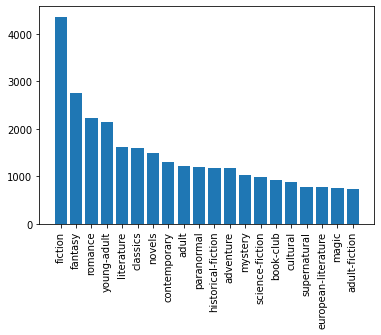

In [55]:
genrecount = genredf.sum()
genrecount = genrecount.sort_values(ascending=False)
plt.bar(genrecount.index[:20],genrecount[:20])
plt.xticks(rotation=90)
plt.show()